In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('../data/IMDB_reviews_preprocessed.csv')

In [4]:
df.head()

,is_spoiler,review_text,rating,review_summary
0,True,in its oscar year shawshank redemption writt...,10,A classic piece of unforgettable film-making.
1,True,the shawshank redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,True,i believe that this film is the best story eve...,8,The best story ever told on film
3,True,yes there are spoilers here this film has ...,10,Busy dying or busy living?
4,True,at the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
X = df['review_text']
y = df['is_spoiler']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

In [7]:
pipeline = make_pipeline(
    vectorizer,
    LogisticRegression(solver='liblinear', random_state=42)
)

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logisticregression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
# Print example predictions
print('Example predictions:')
for i in range(5):
    print(f'Review: {X_test.iloc[i]}')
    print(f'Actual: {y_test.iloc[i]}')
    print(f'Predicted: {y_pred[i]}')
    print()

Example predictions:
Review: i read the comments on the dvd case for  hard candy   and  as a result  expected to see a very compelling  gritty film that would push my buttons  the film was none of these things  but let me talk about the good before i get ahead of myself the opening scene was very well done  we were quickly thrust into the film as an audience  seeing private things  which is a clear theme of the film  what happens when people get to see your private  stuff   can people ever see your private stuff  the subsequent scene  in the cafe  was similarly well executed  hayley was an intriguing character  while jeff was every bit as creepy as he ought to be  jeff was believable as a suffering character  psychologically tormented  the camera work was interesting  the scenery  though limited  was interesting as well  technically  the film was good from the time the two of them went back to jeff s house  things went downhill quickly  there is no reasonable reason to believe the thin

In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.72      0.70     30185
        True       0.70      0.66      0.68     30185

    accuracy                           0.69     60370
   macro avg       0.69      0.69      0.69     60370
weighted avg       0.69      0.69      0.69     60370


Confusion Matrix:
[[21805  8380]
 [10182 20003]]


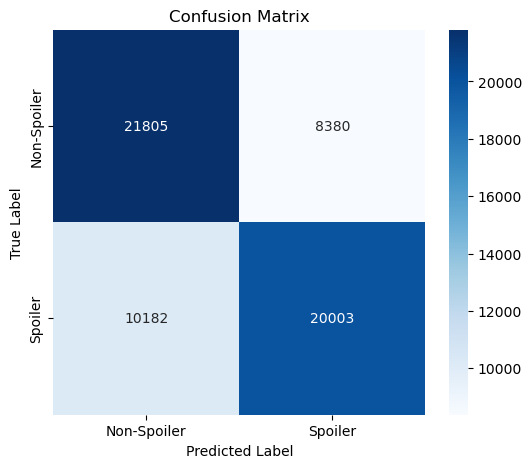

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spoiler', 'Spoiler'], yticklabels=['Non-Spoiler', 'Spoiler'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
